In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [3]:
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Text(0.5, 1.0, 'Label: 5')

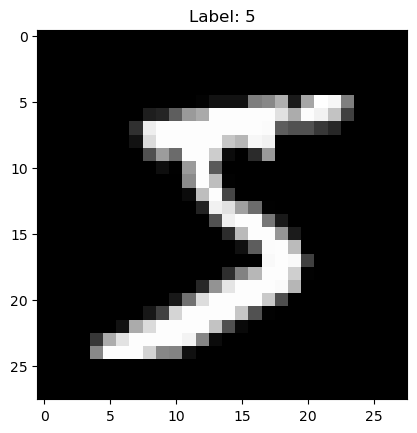

In [5]:
import matplotlib.pyplot as plt
image , label = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Label: {label}')

In [6]:
train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)
test_data = DataLoader(
    test_data,
    batch_size=64,
    shuffle=False
)

In [7]:
class BatchNormalizationCNN(nn.Module):
    def __init__(self):
        super(BatchNormalizationCNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.out(x)
        return x


In [9]:
model = BatchNormalizationCNN()
criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Optimizer

In [10]:
e = []
l = []
for epoch in range(10):
    for images, labels in train_loader:
        X, y = images, labels

        y_pred = model(X) # predict : Forward pass
        loss = criterion(y_pred, y) # calculate loss
        optimizer.zero_grad() # clear previous gradients
        loss.backward() # backpropagation: compute gradients
        optimizer.step() # update weights using gradients

    e.append(epoch)
    l.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
       

Epoch 1, Loss: 0.0263
Epoch 2, Loss: 0.0964
Epoch 3, Loss: 0.0348
Epoch 4, Loss: 0.3833
Epoch 5, Loss: 0.1319
Epoch 6, Loss: 0.0413
Epoch 7, Loss: 0.1235
Epoch 8, Loss: 0.0170
Epoch 9, Loss: 0.0606
Epoch 10, Loss: 0.0059


<Axes: >

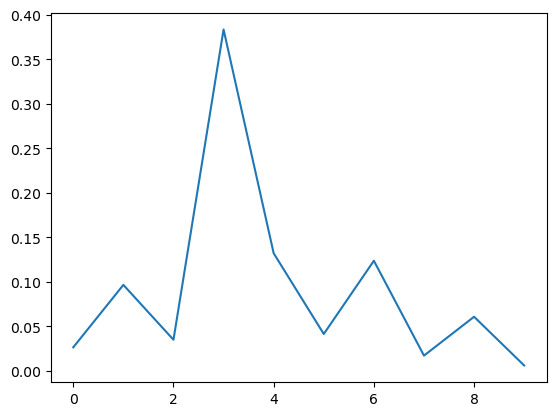

In [11]:
import seaborn as sns

sns.lineplot(x=e, y=l)